# Import libraries & data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('/content/calories_burn.csv')
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


# EDA

In [32]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [34]:
#show if there any missing values in data
data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [35]:
# Show duplicated rows
data.duplicated().sum()

0

In [36]:
# # Convert 'Gender' to numeric values and remove original
from sklearn.preprocessing import LabelEncoder
leabel_encoder = LabelEncoder()
data['Gender_numeric'] =leabel_encoder.fit_transform(data['Gender'])
data.drop('Gender', axis=1, inplace=True)
print(data['Gender_numeric'].unique())

[1 0]


In [37]:
# Display unique values for each column
for col in data.columns:
  print(f"column: {col}")
  print(f"unique values: " ,data[col].unique())
  print("________________________")

column: User_ID
unique values:  [14733363 14861698 11179863 ... 17271188 18643037 11751526]
________________________
column: Age
unique values:  [68 20 69 34 27 36 33 41 60 26 21 66 32 53 39 46 50 67 31 48 29 42 62 38
 25 24 22 74 70 44 61 63 54 47 35 28 77 64 45 57 49 40 55 23 43 52 79 51
 59 30 37 56 58 78 73 76 72 65 71 75]
________________________
column: Height
unique values:  [190 166 179 154 151 158 175 186 146 177 157 171 182 156 169 188 189 148
 165 176 173 159 183 160 184 155 195 152 193 168 174 191 164 198 170 167
 185 163 192 178 197 187 144 202 201 181 136 180 194 143 149 172 153 147
 199 161 204 203 145 200 150 162 205 208 209 206 140 132 196 207 212 135
 133 139 138 217 211 142 137 213 210 141 123 214 127 218 126 134 222 219]
________________________
column: Weight
unique values:  [ 94  60  79  71  58  50  56  85  51  76  54  62  82  67  65  86  93  59
  75  73  88  68  84  80  57  70  66  55  98  69 101  89  64  63  77  61
  83  92  72 100  91  74  87 107  53  96  81  9

In [38]:
# Display unique values for each column
print(data["Height"].value_counts())
print(data["Weight"].value_counts())
print(data["Heart_Rate"].value_counts())
print(data["Body_Temp"].value_counts())
print(data["Calories"].value_counts())

Height
179    394
169    388
176    383
171    374
177    371
      ... 
123      1
127      1
126      1
222      1
219      1
Name: count, Length: 90, dtype: int64
Weight
66     374
67     370
63     361
61     360
68     359
      ... 
120      1
122      1
36       1
128      1
123      1
Name: count, Length: 91, dtype: int64
Heart_Rate
91     564
94     560
101    550
97     531
90     526
99     524
98     523
96     515
95     511
93     509
89     492
100    492
92     485
102    481
105    475
103    462
87     459
88     444
104    440
86     421
85     420
107    407
106    391
84     366
108    352
83     339
82     299
109    276
110    249
81     238
111    207
80     207
79     191
112    169
113    143
78     112
114    107
77     103
76      82
115     71
75      54
116     49
117     44
74      40
73      28
118     21
72      15
119     12
71       8
120      7
121      7
70       5
69       5
67       3
122      3
125      2
68       2
123      1
128      1
Name: co

In [39]:
corr = data.corr(numeric_only=True)
corr.style.background_gradient(cmap="copper_r")

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_numeric
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661,-0.000687
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395,0.003222
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537,0.710534
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481,0.783186
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421,0.003440
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882,0.011555
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558,0.007264
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000,0.022357
Gender_numeric,-0.000687,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357,1.000000


In [40]:
data.drop('User_ID', axis=1, inplace=True)

# Data Cleaning & Preprocessing

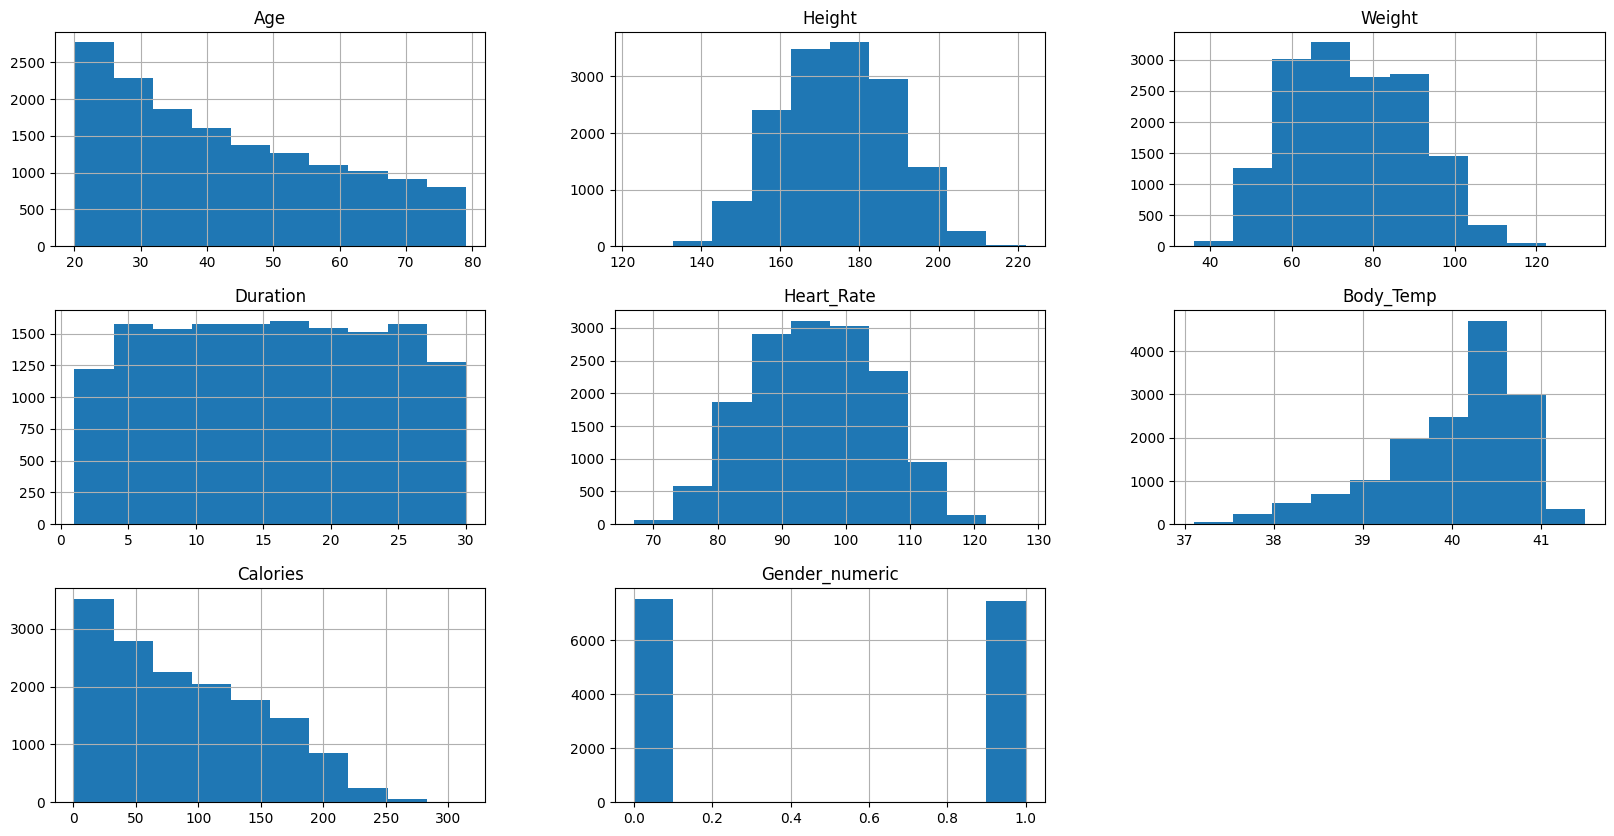

In [41]:
# see the distribution of the data
data.hist(figsize=(20, 10))
plt.show()

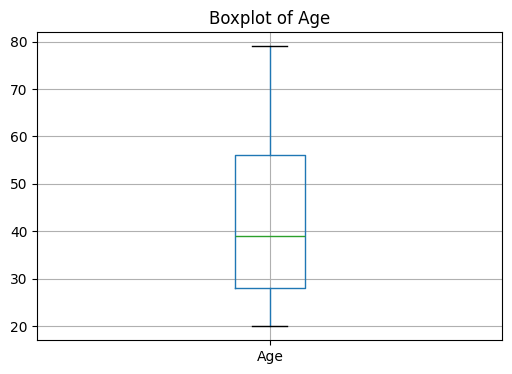

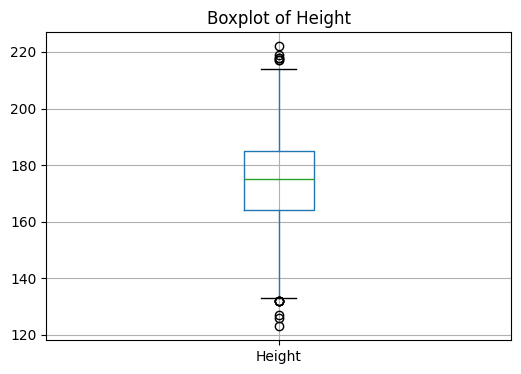

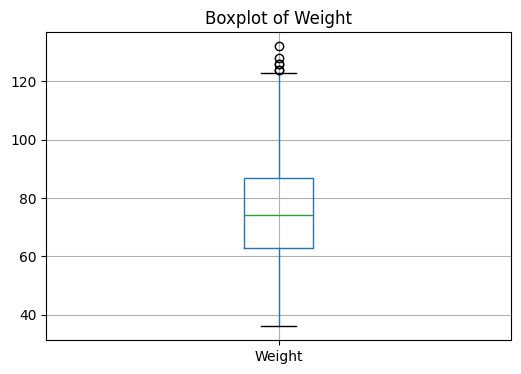

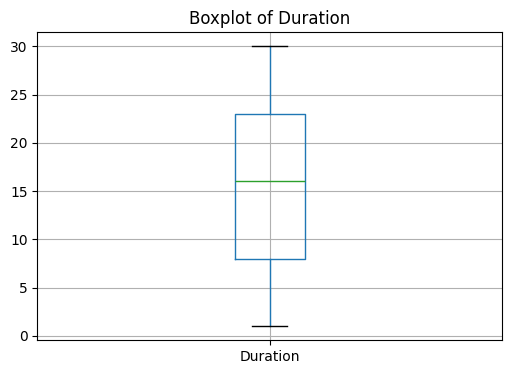

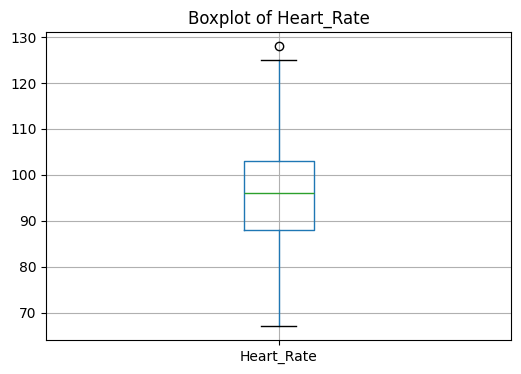

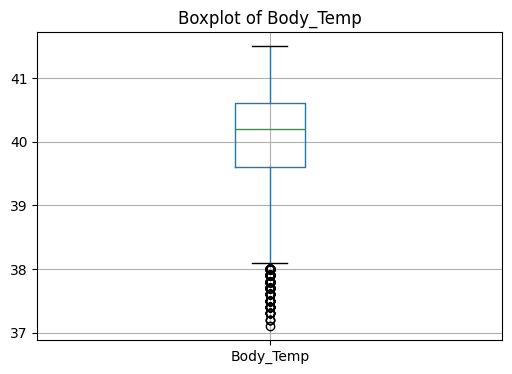

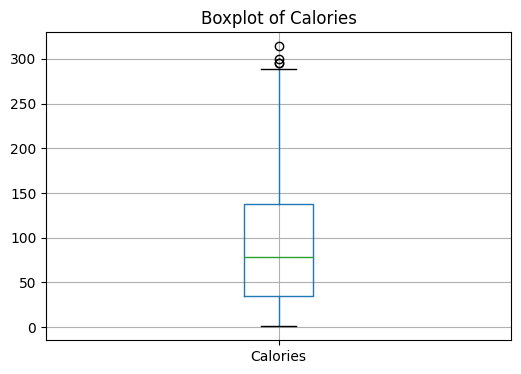

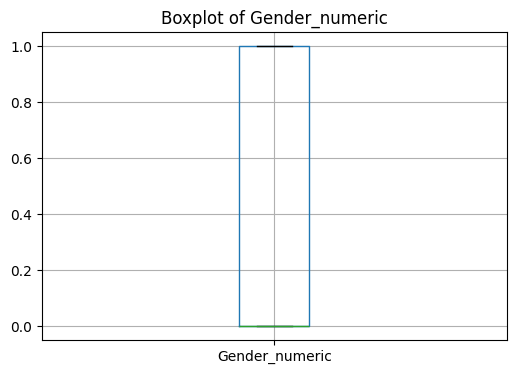

In [42]:
#boxplot of each column before Data Preprocessing to show Outliers
for column in data.columns:
    plt.figure(figsize=(6, 4))
    data.boxplot(column=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [43]:
# Using 0.5 * IQR for a less strict outlier detection, capturing fewer extreme values
Q1 = data['Height'].quantile(0.25)
Q3 = data['Height'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + .5 * IQR
lower_bound = Q1 - .5 * IQR
print(f"upper_bound: {upper_bound}")
print(f"lower_bound: {lower_bound}")
data['Height'] = np.where(data['Height'] > upper_bound, upper_bound, data['Height'])
data['Height'] = np.where(data['Height'] < lower_bound, lower_bound, data['Height'])

upper_bound: 195.5
lower_bound: 153.5


In [44]:
# Using 1.5 * IQR for a less strict outlier detection, capturing fewer extreme values
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f"upper_bound: {upper_bound}")
data['Weight'] = np.where(data['Weight'] > upper_bound, upper_bound, data['Weight'])

upper_bound: 123.0


In [45]:
# Using 1.5 * IQR for a less strict outlier detection, capturing fewer extreme values
Q1 = data['Heart_Rate'].quantile(0.25)
Q3 = data['Heart_Rate'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f"upper_bound: {upper_bound}")
data['Heart_Rate'] = np.where(data['Heart_Rate'] > upper_bound, upper_bound, data['Heart_Rate'])

upper_bound: 125.5


In [46]:
# Using 1.5 * IQR for a less strict outlier detection, capturing fewer extreme values
Q1 = data['Body_Temp'].quantile(0.25)
Q3 = data['Body_Temp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
print(f"lower_bound: {lower_bound}")
data['Body_Temp'] = np.where(data['Body_Temp'] < lower_bound, lower_bound, data['Body_Temp'])

lower_bound: 38.1


In [47]:
# Using 1.5 * IQR for a less strict outlier detection, capturing fewer extreme values
Q1 = data['Calories'].quantile(0.25)
Q3 = data['Calories'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f"upper_bound: {upper_bound}")
data['Calories'] = np.where(data['Calories'] > upper_bound, upper_bound, data['Calories'])

upper_bound: 292.5


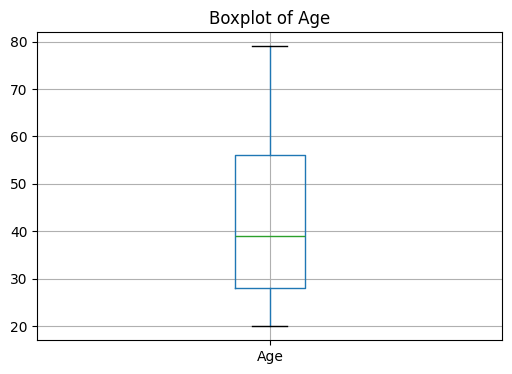

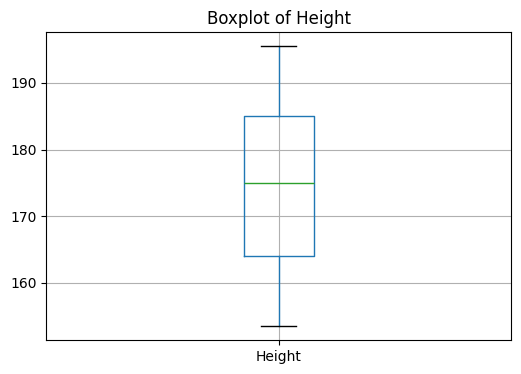

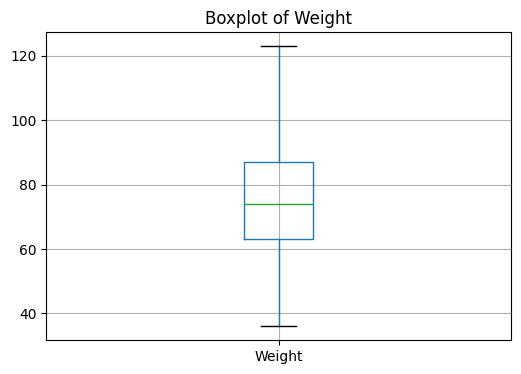

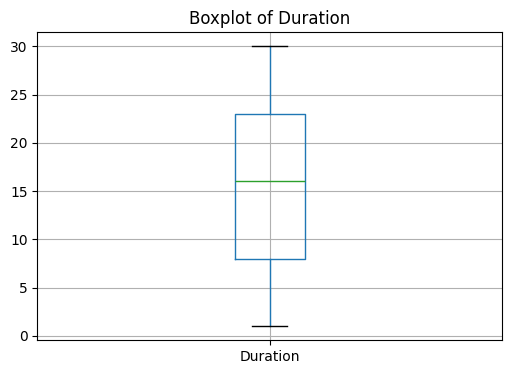

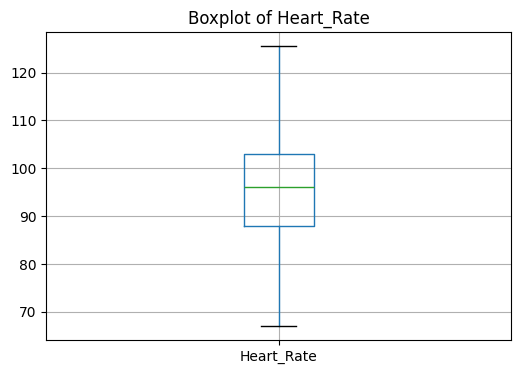

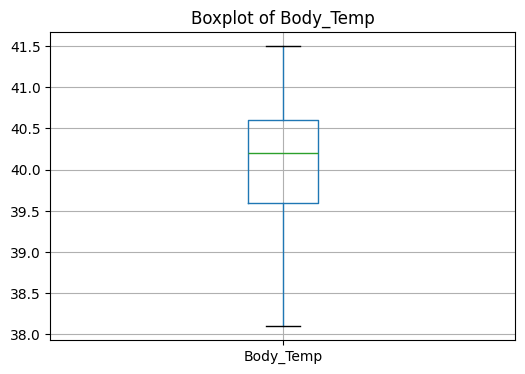

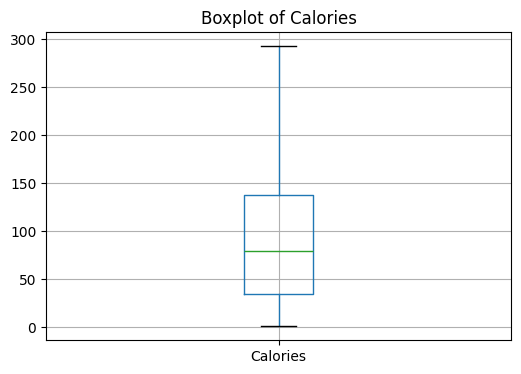

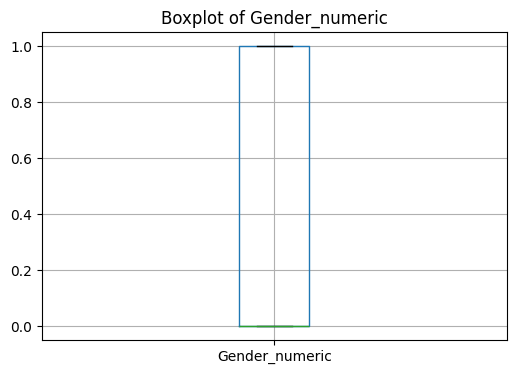

In [48]:
#boxplot of each column after Data Preprocessing
for column in data.columns:
    plt.figure(figsize=(6, 4))
    data.boxplot(column=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [49]:
data.describe()


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_numeric
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.475567,74.965400,15.530600,95.518367,40.033207,89.537267,0.496467
std,16.980264,12.935537,15.030691,8.319203,9.582785,0.757570,62.449328,0.500004
min,20.000000,153.500000,36.000000,1.000000,67.000000,38.100000,1.000000,0.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000,0.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000,0.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000,1.000000
max,79.000000,195.500000,123.000000,30.000000,125.500000,41.500000,292.500000,1.000000


# Build Model

In [50]:
X=data.drop('Calories',axis=1)
y=data['Calories']

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RF= RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
RF.fit(X_train_scaled, y_train)
y_pred = RF.predict(X_test_scaled)

# Evaluate the model
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
R_Squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {MAE:.2f}")
print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"R² Score: {R_Squared:.2f}")


Mean Absolute Error (MAE): 6.95
Mean Squared Error (MSE): 98.75
R² Score: 0.98


In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb = XGBRegressor(random_state=42)

param_grid = {
    "max_depth": [3, 5, 7, 10],  # Different tree depths to test
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # Learning rate for gradient boosting
    "n_estimators": [50, 100, 200],  # Number of trees in the model
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

grid_search.fit(X_train_scaled, y_train)

print(f"Best Hyperparameters Found: {grid_search.best_params_}")
xgb = grid_search.best_estimator_

y_pred = xgb.predict(X_test_scaled)

# Evaluate the model
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
R_Squared = r2_score(y_test, y_pred)

print("XGBoost Performance After Hyperparameter Tuning:")
print(f"Mean Absolute Error (MAE): {MAE:.2f}")
print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"R² Score: {R_Squared:.2f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters Found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBoost Performance After Hyperparameter Tuning:
Mean Absolute Error (MAE): 1.18
Mean Squared Error (MSE): 2.70
R² Score: 1.00


In [52]:
import joblib
joblib.dump(xgb, "optimized_xgboost_model.pkl")


['optimized_xgboost_model.pkl']